#**Demo: K-Means Clustering Using Python**

###**Problem Definition**

Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.




###**Dataset Description**

The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

The Attributes are:

>* CustomerID
>* CustomerGender
>* CustomerAge
>* CustomerCity
>* AnnualIncome
>* CreditScore
>* SpendingScore
>* CustomerCityID

###**Tasks to be performed**


>* Importing Required Libraries
>* Analyzing the data
>* Understanding K-Means
>* Implementing K-Means from Scratch
>* Implementing K-Means using sklearn library 

###**Importing Required Libraries**


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [0]:
df1 = pd.read_csv('/content/Shopping_CustomerData.csv')
df1.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


####**Analyzing the Data**

In [0]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df_new = df1[["CustomerAge","SpendingScore"]]
df_new.head()


,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [0]:
df_new.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


In [0]:
#Checking for Null Values
df_new.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

**Lets plot these two variables and visualize them**

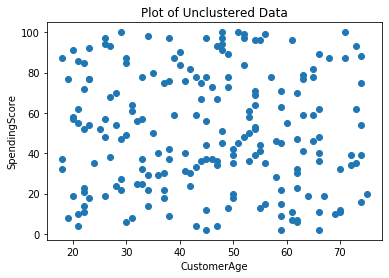

In [0]:
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.title('Plot of Unclustered Data')
plt.show()


**From above, you can see the unclustered data**

## **Implementing K-Means from Scratch**


**Stopping Criteria**

We stop the K-Means Clustering Algorithm **when the centroids of the clusters are not changing at all even after multiple iterations. That means the algorithm is not finding any new patterns.**

The algorithm will stop the training **once the maximum number of iterations has reached. For example - if you set the maximum number of iterations as 30, the algorithm will stop after 30 iterations.**


In [0]:
#Step-1
k = 3#Assuming the value of k to be 3
np.random.seed(40)

#Here, we are selecting three points randomly as centroids 
random_centroids=[]
for i in range(1,k+1):
  random_centroids.append([np.random.randint(1,100), np.random.randint(1,100)])#Here, we have selecting the random values between 1 and 100 because most of of our values lie in this range
print('Randomly selected points as random_centroids:',random_centroids)


Randomly selected points as random_centroids: [[71, 92], [8, 38], [57, 51]]


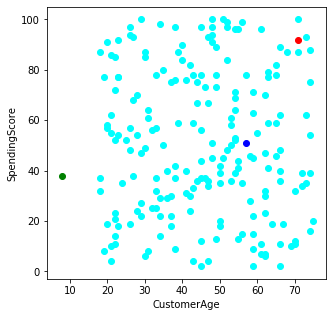

In [0]:
#Here, we are plotting the random_centroids that we selected previously
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color='cyan')
length = len(random_centroids)
colors1=['r','g','b','cyan','yellow','black']
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.show()


In [0]:
#Step-2

#Here, we are calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
 def assignment(df_new,random_centroids):

  for i in range(length) :
    df_new['Distance from Centroid {}'.format(i)]=(np.sqrt((df_new.iloc[:,0] - random_centroids[i][0]) ** 2 + (df_new.iloc[:,1] - random_centroids[i][1]) ** 2))
   
  list1=[]
  list2=[]
  for a,b,c in zip(df_new['Distance from Centroid 0'],df_new['Distance from Centroid 1'],df_new['Distance from Centroid 2']):
    d = min(a,b,c)
   
    if d == a:
      list1.append(0)
      list2.append('r')
    elif d == b:
      list1.append(1)
      list2.append('g')
    else:
      list1.append(2)
      list2.append('b')
  df_new['Closest_Centroid'] = list1
  df_new['Color']=list2
  return df_new 

In [0]:
df_new = assignment(df_new, random_centroids)
df_new.head()

,CustomerAge,SpendingScore,Distance from Centroid 0,Distance from Centroid 1,Distance from Centroid 2,Closest_Centroid,Color
0,49,78,26.076810,57.280014,28.160256,0,r
1,59,63,31.384710,56.797887,12.165525,2,b
2,54,69,28.600699,55.470713,18.248288,2,b
3,42,30,68.447060,34.928498,25.806976,2,b
4,30,6,95.273291,38.832976,52.478567,1,g


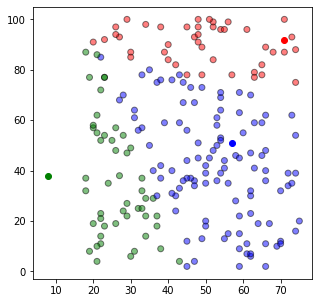

In [0]:
#Plotting the clusters
plt.figure(figsize=(5,5))
plt.scatter(df_new.iloc[:,0],df_new.iloc[:,1],color =df_new['Color'],alpha = 0.5,edgecolor = 'k')
for i in range(length):
  plt.scatter(*random_centroids[i],color=colors1[i])


In [0]:
#Step-3

#Update Stage
#In this satge, we are updating the centroids of the newly formed clusters
def update(parameter):
    for i in range(length):
        random_centroids[i][0] = np.mean(df_new[df_new['Closest_Centroid'] == i]['CustomerAge'])
        random_centroids[i][1] = np.mean(df_new[df_new['Closest_Centroid'] == i]['SpendingScore'])
    return parameter

In [0]:
random_centroids = update(random_centroids)
random_centroids

[[49.16279069767442, 90.09302325581395],
 [26.387755102040817, 35.97959183673469],
 [52.75, 41.7037037037037]]

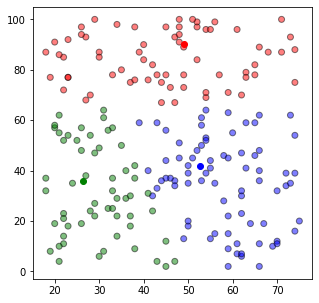

In [0]:
#Repeat Assignment Step
#Here, we are again calculating the distance between the datapoints and our centroids and assigning each data-point to the closest cluster
df_new = assignment(df_new, random_centroids)  
df_new.head()
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
for i in range(length):
  plt.scatter(*random_centroids[i], color=colors1[i])
plt.show()

In [0]:
#Step-4

#In this step, we are going to keep repeating the update centroid and the assignment stage until the centroids stop changing i.e. No New Clusters being formed.
count=1
while True:
  old_random_centroids = np.round(random_centroids)
  print('Old Centroid',old_random_centroids)
  count+=1
  random_centroids = update(random_centroids)
  
  new_random_centroids = np.round(random_centroids)
  print('New Centroid',new_random_centroids)

  df_new = assignment(df_new, random_centroids)
  result=np.allclose(old_random_centroids,new_random_centroids)#np.allclose() function checks if two arrays are equal element-wise
  print(result)
  if result == True:
    break
  
    
print(count)


Old Centroid [[49. 90.]
 [26. 36.]
 [53. 42.]]
New Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
False
Old Centroid [[45. 85.]
 [30. 32.]
 [58. 35.]]
New Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
False
Old Centroid [[45. 82.]
 [30. 31.]
 [59. 33.]]
New Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 82.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
False
Old Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
New Centroid [[45. 81.]
 [31. 30.]
 [60. 32.]]
True
6


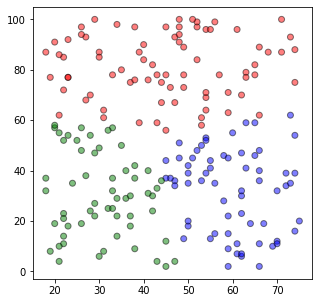

In [0]:
plt.figure(figsize=(5, 5))
plt.scatter(df_new.iloc[:,0], df_new.iloc[:,1], color=df_new['Color'], alpha=0.5, edgecolor='k')
plt.show()

##**Implementing K-Means using scikit learn**

In [0]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df = df1[["CustomerAge","SpendingScore"]]
df.head()


,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [0]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=3)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 1, 2, 1, 0, 2,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 2,
       1, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 1, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       2, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 2,
       1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 1, 0, 1, 0,
       0, 0, 2, 1, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0,
       2, 2], dtype=int32)

In [0]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[47.26666667, 46.82666667],
       [44.82089552, 84.65671642],
       [44.06896552, 16.5       ]])

In [0]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

69240.59269514497

###**Let's visualize the Clustered Data**

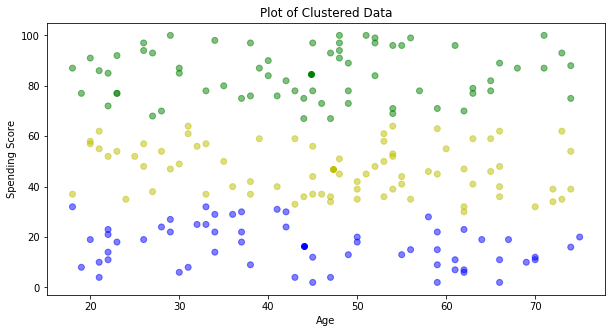

In [0]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['CustomerAge'], df['SpendingScore'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

###**How to determine the value of K?**

>* If we know how many classes we want to classify, then we use that value as 'k'. For Example - All of us have heard of the Iris data or even worked with it earlier. It has three classes we could classify our flowers into. So, in that case the value of k could be taken as 3.
>* If we don't know how many classes we want, then we will have to decide what the best 'k' value is. A very popular to find the value of 'k' is **Elbow Method**

###**Elbow Method**

In [0]:
inertia_list = []
for num_clusters in np.arange(1, 21):
    kmeans =KMeans(n_clusters=num_clusters)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

In [0]:
inertia_list

[215843.515,
 93076.96095008052,
 69228.85879694519,
 52510.21384913898,
 38785.428706963765,
 30111.447935988363,
 25034.331104658668,
 21666.294699374703,
 19248.411694693114,
 16850.494389978216,
 15072.98511578179,
 13503.942673584585,
 12285.915581876845,
 11712.149767863491,
 10626.60641063443,
 9927.96220242176,
 8973.745950282948,
 8778.219380782617,
 8449.319964186141,
 7539.279273504274]

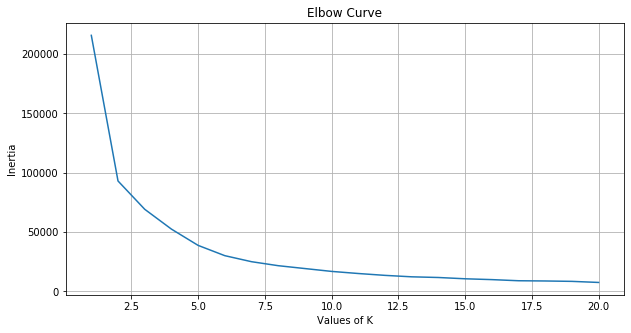

In [0]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 21), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 10.**